# Generate Structures from NCA in Minecraft using pretrained models

### Imports

In [1]:
from test_evocraft_py.minecraft_pb2 import *
from test_evocraft_py.minecraft_pb2_grpc import *

from os import listdir
from os.path import isfile, join
import numpy as np
import torch
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
from einops import rearrange, repeat
import numpy as np
from IPython.display import clear_output
import torch
import time
from tqdm import tqdm
from torchsummaryX import summary

In [2]:
from artefact_nca.trainer.voxel_ca_trainer import VoxelCATrainer
from artefact_nca.utils.minecraft import MinecraftClient, convert_to_color, Blockloader, spawn_entities
from artefact_nca.utils.minecraft.voxel_utils import replace_colors

### NBT Path (replace this with your own)

In [3]:
base_nbt_path = "../artefact_nca/data/structs_dataset/nbts"

### Visualize Output

In [4]:
def visualize_output(ct, out):
    clear_output()
    out = rearrange(out, 'b d h w c -> b w d h c')
    argmax = np.argmax(out[:, :, :, :, :ct.num_categories], -1)
    out = replace_colors(argmax, ct.dataset.target_color_dict)[0]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.voxels(out, facecolors=out, edgecolor='k')
    
    plt.show()
    return argmax

### Minecraft Client

In [5]:
channel = grpc.insecure_channel("localhost:5001")
client = MinecraftServiceStub(channel)

## Plain Village House

Block priority:  []


<ipython-input-6-c59f68677cad>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


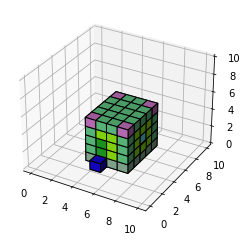

In [6]:
nbt_path = "{}/village/plain_village_house.nbt".format(base_nbt_path)
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("plain_village_house", nbt_path=nbt_path, load_coord=(50,10,10))


color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [7]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/PlainVillageHouse/plain_village_house.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/PlainVillageHouse/PlainVillageHouse.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  []


<ipython-input-4-a8b7ad4518b5>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


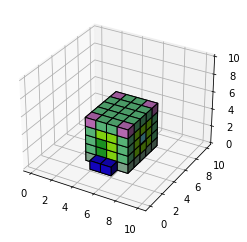

In [8]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=100)

_ = visualize_output(ct, final.cpu().numpy())

In [20]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 134.86it/s]


### Plain Blacksmith

Block priority:  []


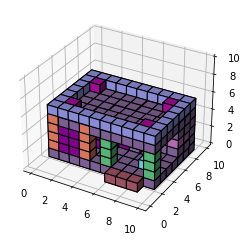

In [17]:
nbt_path = "{}/village/plain_village_blacksmith.nbt".format(base_nbt_path)
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("plain_village_blacksmith", nbt_path=nbt_path, load_coord=(50,10,10))


color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [19]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/PlainBlacksmith/plain_blacksmith.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/PlainBlacksmith/PlainBlacksmith.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  []


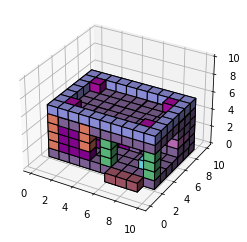

In [21]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=200)

_ = visualize_output(ct, final.cpu().numpy())

In [22]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 329.61it/s]


## Jungle Temple

#### Read in jungle temple from nbt file
- Replace nbt dir here with your own

In [23]:
nbt_path = "{}/temples/jungle_temple.nbt".format(base_nbt_path)

Block priority:  []


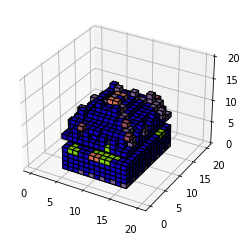

In [24]:
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("jungle_temple", nbt_path=nbt_path, load_coord=(50,10,10))


color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [28]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/JungleTemple/jungle_temple.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/JungleTemple/JungleTemple.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  []


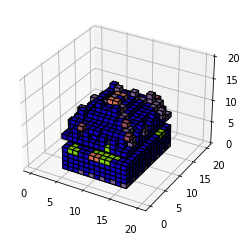

In [29]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=200)

_ = visualize_output(ct, final.cpu().numpy())

In [30]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 33.23it/s]


## Load in Tree

In [31]:
nbt_path = "{}/village/Extra_dark_oak.nbt".format(base_nbt_path)

Block priority:  []


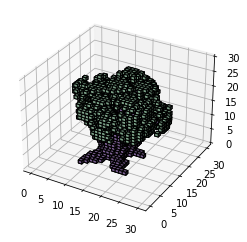

In [32]:
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("Extra_dark_oak", nbt_path=nbt_path, load_coord=(50,10,10))

color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [33]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/Extra_dark_oak/extra_dark_oak.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/Extra_dark_oak/Extra_dark_oak.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  []


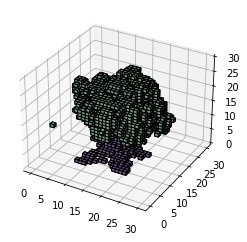

In [34]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=200)

_ = visualize_output(ct, final.cpu().numpy())

In [35]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 24.27it/s]


### Mini Castle

In [24]:
nbt_path = "{}/mini_castle.nbt".format(base_nbt_path)

In [25]:
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("mini_castle", nbt_path=nbt_path, load_coord=(50,10,10))

Block priority:  []


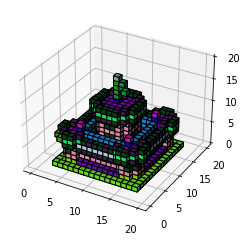

In [26]:
color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [27]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/MiniCastle/mini_castle.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/MiniCastle/MiniCastle.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  []


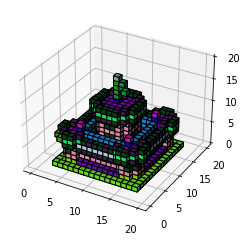

In [28]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=200)

_ = visualize_output(ct, final.cpu().numpy())

In [29]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(200)

100%|██████████| 5/5 [00:00<00:00, 63.12it/s]


### Regenerating Mini Castle

In [30]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/MiniCastle/regenerating_mini_castle.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/MiniCastle/RegeneratingMiniCastle.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  []


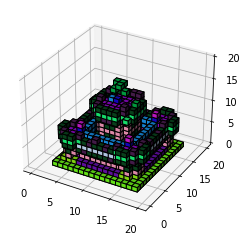

In [53]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=64)

_ = visualize_output(ct, final.cpu().numpy())

#### Apply damage

In [54]:
damaged = ct.apply_damage(final,num_damaged=1)

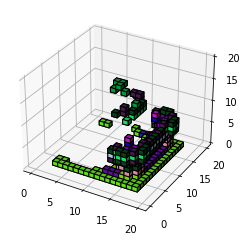

In [55]:
_ = visualize_output(ct, damaged.cpu().numpy())

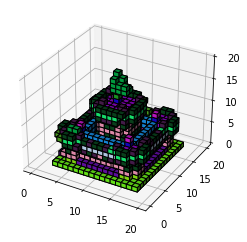

In [56]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=64, initial=damaged)

_ = visualize_output(ct, final.cpu().numpy())

In [57]:
initial_states = [damaged]

m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(200, initial_states=initial_states)

100%|██████████| 5/5 [00:00<00:00, 43.87it/s]


## Cathedral

Block priority:  [179]


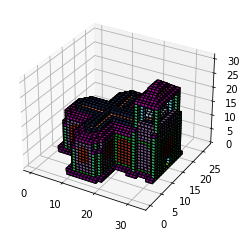

In [58]:
nbt_path = "{}/village/Extra_cathedral.nbt".format(base_nbt_path)
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("plain_village_house", nbt_path=nbt_path, load_coord=(50,10,10), load_entity_config={"padding":[[1,1], [0,1], [1,1]], "block_priority":[REDSTONE_BLOCK]})

color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [59]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/Cathedral/cathedral.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/Cathedral/Cathedral.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  [179]


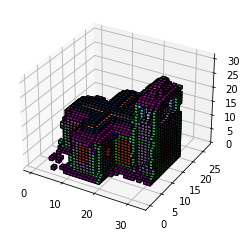

In [60]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=100)
_ = visualize_output(ct, final.cpu().numpy())

In [61]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 18.91it/s]


### Apartment Block

Block priority:  [179]


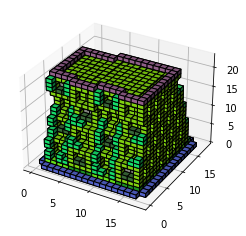

In [63]:
nbt_path = "{}/pixl_apartmentblock.nbt".format(base_nbt_path)
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("pixl_apartmentblock", nbt_path=nbt_path, load_entity_config={"padding": [[0,0], [0,0], [0,0]]
,"block_priority":[REDSTONE_BLOCK]})
color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [64]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/ApartmentBlock/apartment_block.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/ApartmentBlock/ApartmentBlock.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  [179]


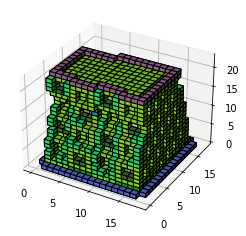

In [65]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=100)
_ = visualize_output(ct, final.cpu().numpy())

In [66]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 39.48it/s]


### Flying Machine

In [70]:
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity(entity_name="flying_machine", load_coord=(50,10,10))

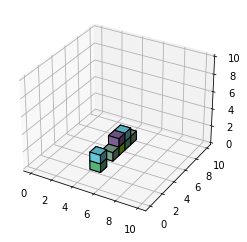

In [71]:
color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [72]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/FlyingMachine/flying_machine.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/FlyingMachine/FlyingMachine.pt",
                        "use_cuda":False
                    }
                )

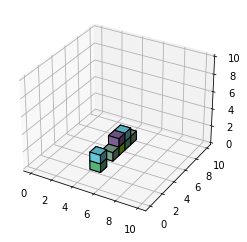

In [73]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=100)
_ = visualize_output(ct, final.cpu().numpy())

In [74]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 181.92it/s]


## Caterpillar

Block priority:  [179]


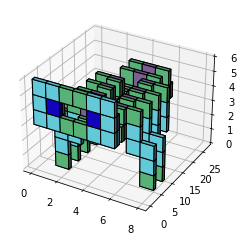

In [80]:
nbt_path = "{}/caterpillar_short.nbt".format(base_nbt_path)
blocks, unique_vals, target, color_dict, unique_val_dict = MinecraftClient.load_entity("caterpillar_short", nbt_path=nbt_path,load_coord=(50,10,10), load_entity_config={"place_block_priority_first":False, 
                                                                                                                                                                         "block_priority":[179],
                                                                                                                                                                         "padding":[[0,0], [0,0], [0,0]]})
color_arr = convert_to_color(target, color_dict)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(color_arr, facecolors=color_arr, edgecolor='k')

plt.show()

In [81]:
ct = VoxelCATrainer.from_config(
                    "../pretrained_models/Caterpillar/regenerating_caterpillar.yaml",
                    config={
                        "pretrained_path":"../pretrained_models/Caterpillar/RegeneratingCaterpillar.pt",
                        "dataset_config":{"nbt_path":nbt_path},
                        "use_cuda":False
                    }
                )

Block priority:  [179]


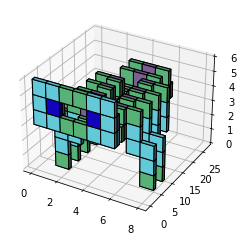

In [85]:
with torch.no_grad():
    final, states, life_masks = ct.rollout(steps=64)
_ = visualize_output(ct, final.cpu().numpy())

In [86]:
m = MinecraftClient(ct, (-10, 10, 10))
m.spawn(100)

100%|██████████| 5/5 [00:00<00:00, 150.01it/s]


### Regeration

##### Damage

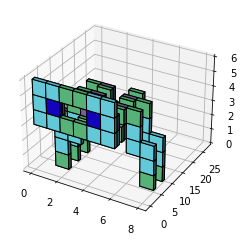

In [87]:
front = final.clone()
front[:, 13:, :, :, :] *= 0.0
front[:, 13:, :, :, 0] = 1.0
_ = visualize_output(ct, front.cpu().numpy())

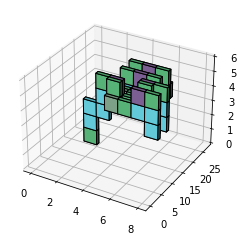

In [88]:
back = final.clone()
back[:, :13, :, :, :] *= 0.0
back[:, :13, :, :, 0] = 1.0

_ = visualize_output(ct, back.cpu().numpy())

### Recover from tail

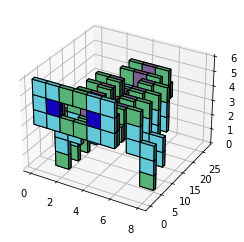

In [89]:
with torch.no_grad():
    recovered, states, life_masks = ct.rollout(steps=100, initial=back)
recovered_from_tail = visualize_output(ct, recovered.cpu().numpy())

### Recover from head

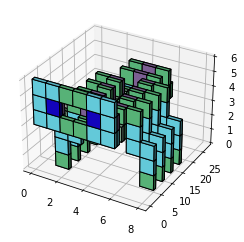

In [90]:
with torch.no_grad():
    recovered, states, life_masks = ct.rollout(steps=100, initial=front)
recovered_from_head = visualize_output(ct, recovered.cpu().numpy())

In [91]:
m_back = MinecraftClient(ct, (-70, 10, 10))

In [92]:
m_front = MinecraftClient(ct, (-120, 10, 10))

In [96]:
Blockloader.clear_blocks(client, (-150, 10, -30), (-50, 50, 50))

In [99]:
runner_list = [m_back, m_front]
initial_states = [back, front]

spawn_entities(runner_list, steps=150, unique_val_dict=unique_val_dict, initial_states=initial_states, block_priority=[REDSTONE_BLOCK], increments=5, wait=5)

100%|██████████| 5/5 [00:00<00:00, 150.43it/s]
